## Task 1: Titanic - Machine Learning from Disaster
This task involves working with the Titanic dataset, which contains passenger information from the ill-fated Titanic ship. The dataset includes features such as age, gender, class, and whether passengers survived or not. As a machine learning intern, your objective is to build a predictive model that can classify whether a passenger survived or not based on the available features. This is a binary classification problem.

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## Acquire data
Combining these datasets to run certain operations on both datasets together.

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

## Domain Analysis
- PassengerId: A unique identifier for each passenger.
- Survived: Indicates whether the passenger survived (1) or not (0).
- Pclass: Passenger class (1st, 2nd, or 3rd).
- Name: Name of the passenger.
- Sex: Gender of the passenger.
- Age: Age of the passenger.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Fare paid for the ticket.
- Cabin: Cabin number where the passenger stayed.
- Embarked: Port of embarkation.

## Basic checks

In [4]:
train_df.shape

(891, 12)

In [5]:
data= train_df

In [6]:
data.shape

(891, 12)

In [7]:
data.size

10692

In [8]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**- Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.**

**- Name feature may contain errors or typos as there are several ways used to describe a name.**


In [10]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
- Survived is a categorical feature with 0 or 1 values.
- Nearly 30% of the passengers had siblings and/or spouse aboard.
- Fares varied significantly with few passengers (<1%) paying as high as $512.
- Few elderly passengers (<1%) within age range 65-80.

In [11]:
data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


- Names are unique across the dataset (count=unique=891)
- Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
- Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
- Embarked takes three possible values. S port used by most passengers (top=S)
- Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [12]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory data Analysis

<Axes: xlabel='Survived', ylabel='count'>

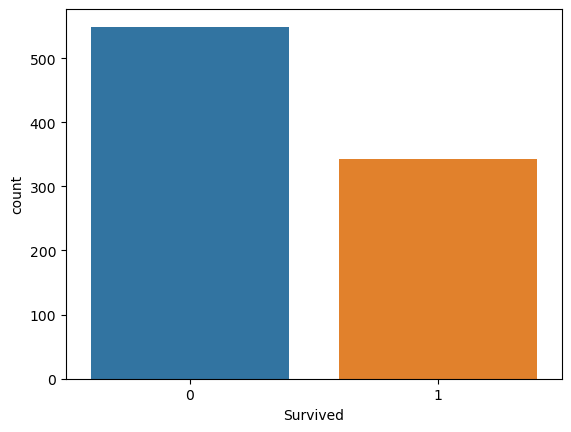

In [14]:
sns.countplot(x="Survived", data=data)

Text(0.5, 1.0, 'Survived count by Gender')

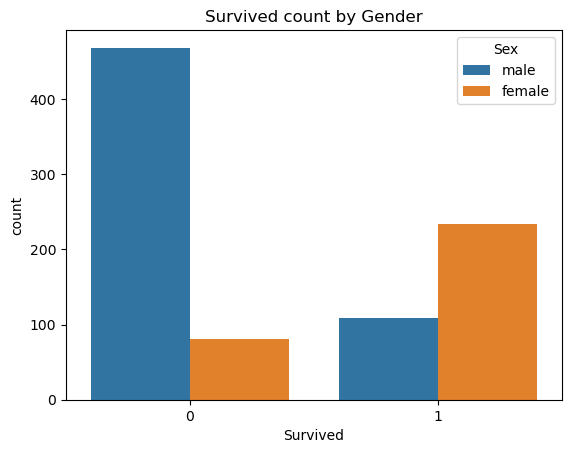

In [15]:
sns.countplot(x="Survived", hue="Sex", data=data)
plt.title("Survived count by Gender")

Text(0.5, 1.0, 'Survived count by Passenger Class')

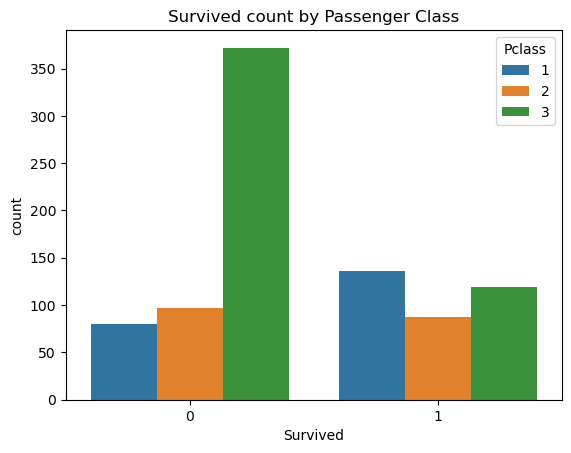

In [16]:
sns.countplot(x="Survived", hue="Pclass", data=data)
plt.title("Survived count by Passenger Class")

Text(0.5, 1.0, 'Age Distribution by Survived')

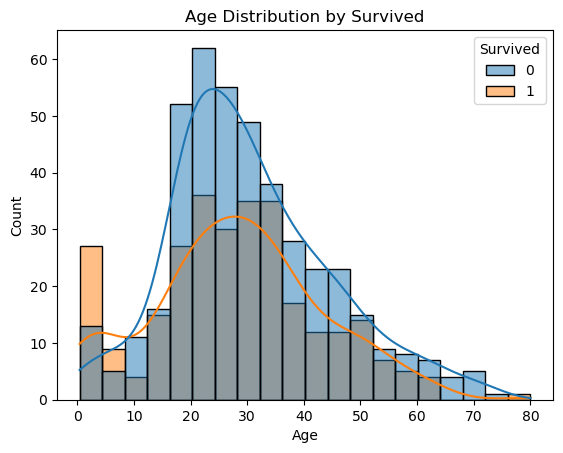

In [17]:
sns.histplot(data=data,x="Age", hue="Survived", kde=True)
plt.title("Age Distribution by Survived")

Text(0.5, 1.0, 'Fare Distribution by Survived')

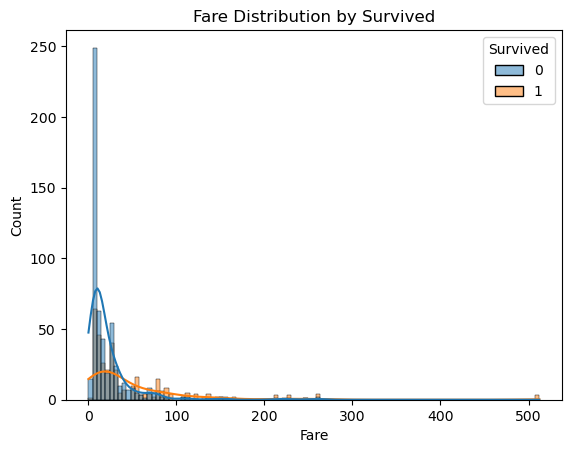

In [18]:
sns.histplot(data=data,x="Fare", hue="Survived", kde=True)
plt.title("Fare Distribution by Survived")

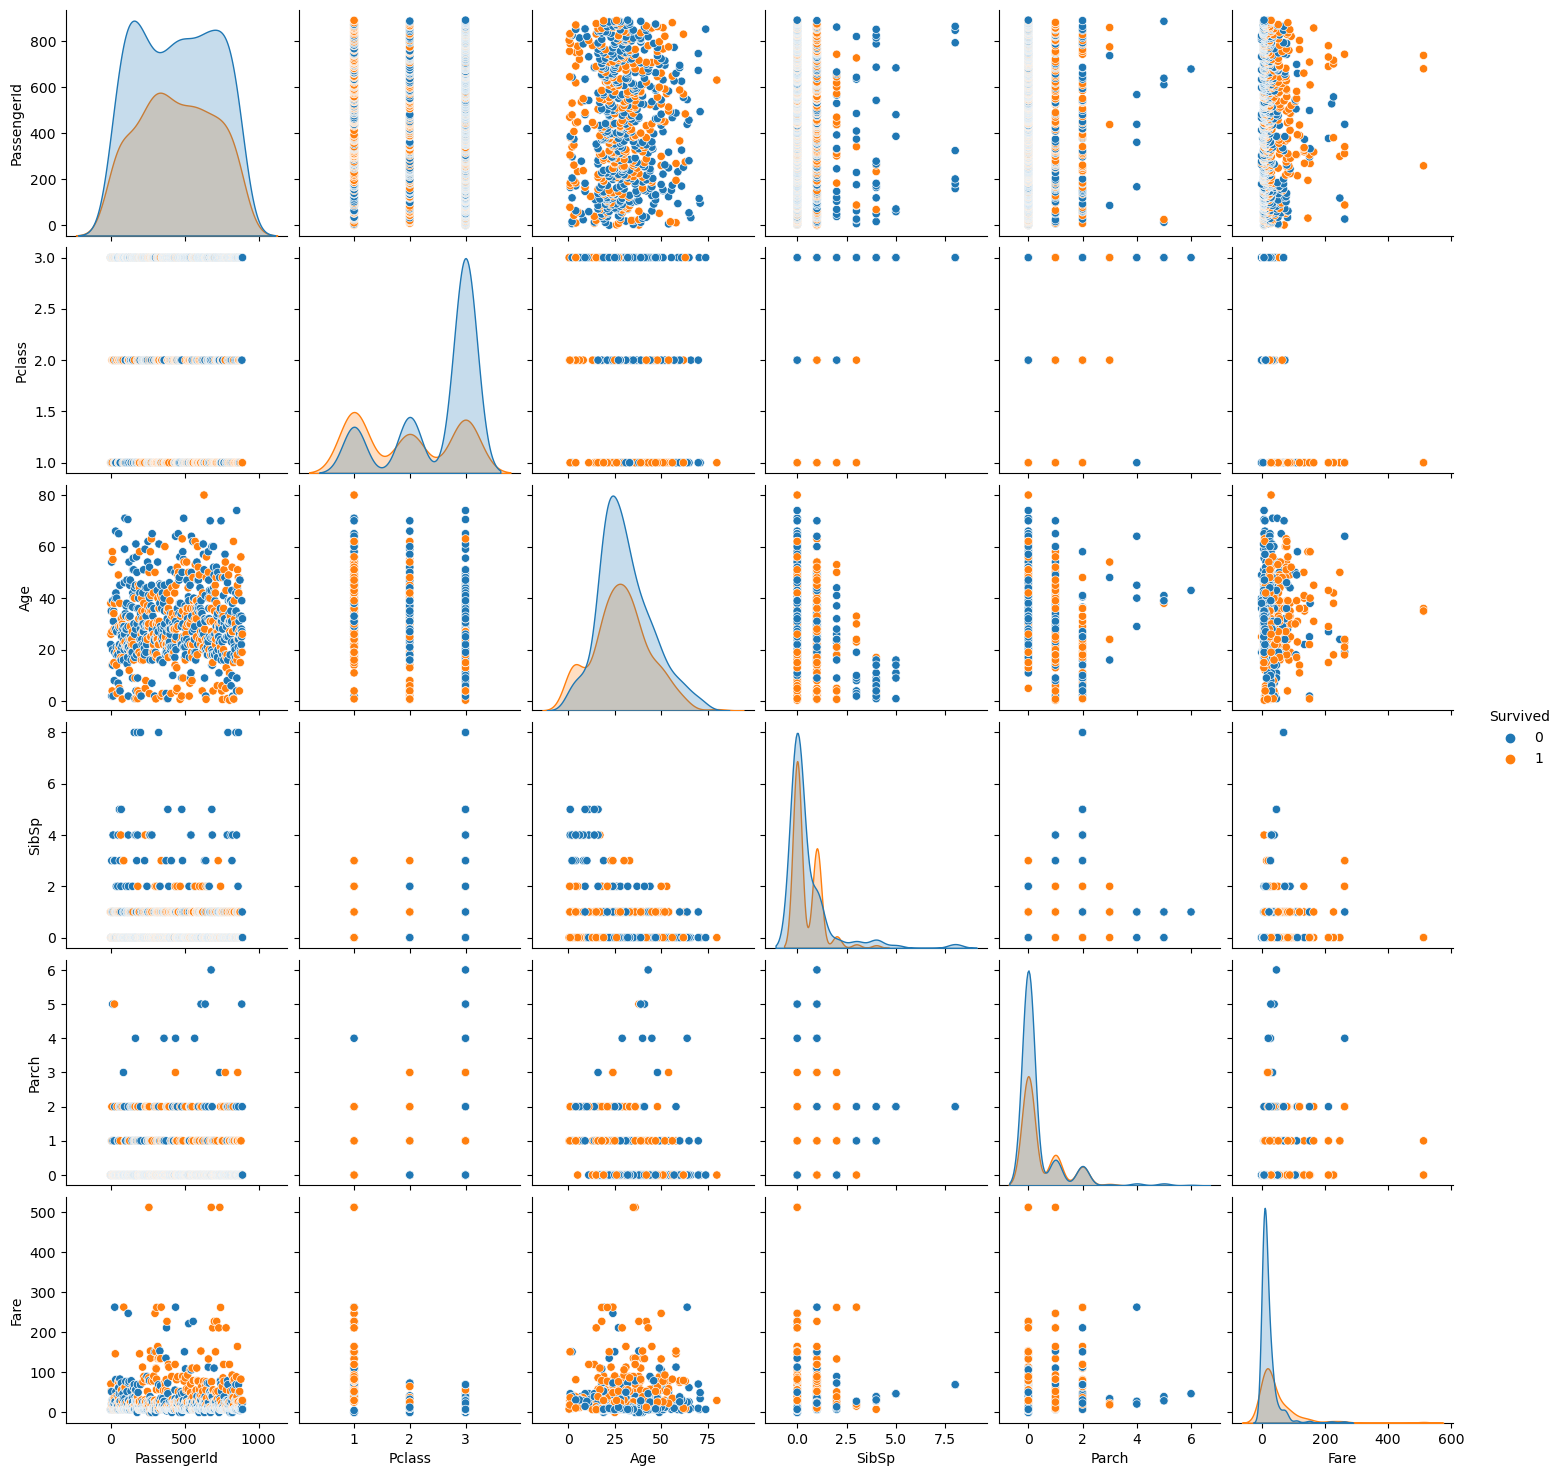

In [19]:
sns.pairplot(data=data,hue="Survived")

## Data Pre-processing

In [20]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [21]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [22]:
data.duplicated().sum()

0

### Replacing the null values

<Axes: xlabel='Age', ylabel='Count'>

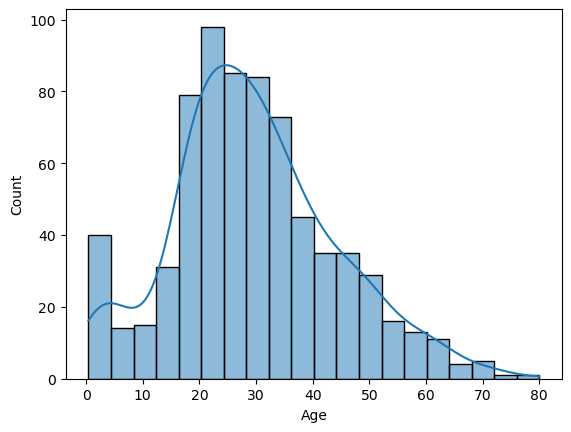

In [23]:
sns.histplot(data=data,x="Age", kde=True)

In [24]:
data["Age"].median()

28.0

In [25]:
data.loc[data["Age"].isnull()==True,"Age"]=data["Age"].median()

In [26]:
data["Cabin"].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [27]:
data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [28]:
data.loc[data["Cabin"].isnull()==True,"Cabin"]="B96"

In [29]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
data["Embarked"].mode()

0    S
Name: Embarked, dtype: object

In [31]:
data.loc[data["Embarked"].isnull()==True,"Embarked"]="S"

In [32]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Check Outliers

In [33]:
num_data=data.select_dtypes(include=["int64","float64"])

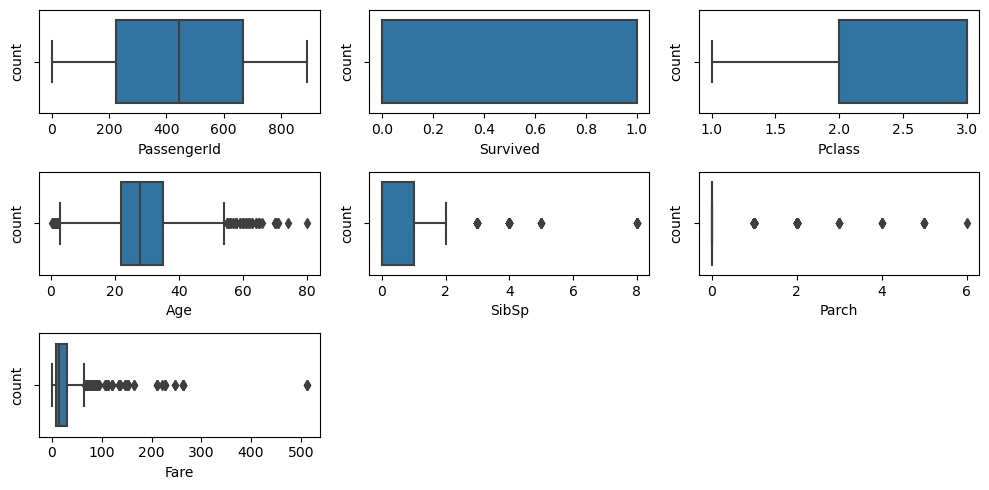

In [34]:
plt.figure(figsize=(10,5),facecolor="white")
plotnumber=1
for column in num_data:
    if plotnumber<9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column])
        plt.xlabel(column,fontsize=10)
        plt.ylabel("count",fontsize=10)
    plotnumber+=1
plt.tight_layout()

## Scaling 

In [35]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[["Pclass","Age","SibSp","Parch","Fare"]]=scale.fit_transform(data[["Pclass","Age","SibSp","Parch","Fare"]])

In [36]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.014151,B96,S
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,C85,C
2,3,1,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,B96,S
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,C123,S
4,5,0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.015713,B96,S


## converting categorical data into numerical

In [37]:
data2=data.copy()

In [38]:
data2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1.0,"Braund, Mr. Owen Harris",male,0.271174,0.125,0.0,A/5 21171,0.014151,B96,S
1,2,1,0.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,C85,C
2,3,1,1.0,"Heikkinen, Miss. Laina",female,0.321438,0.000,0.0,STON/O2. 3101282,0.015469,B96,S
3,4,1,0.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,C123,S
4,5,0,1.0,"Allen, Mr. William Henry",male,0.434531,0.000,0.0,373450,0.015713,B96,S


In [39]:
data.select_dtypes(include=["object"])

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,B96,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,B96,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,B96,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,B96,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,B96,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [40]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [41]:
df1=pd.get_dummies(data["Name"],prefix="Name",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop("Name",axis=1)

In [42]:
df1=pd.get_dummies(data["Sex"],prefix="Sex",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop("Sex",axis=1)

In [43]:
df1=pd.get_dummies(data["Ticket"],prefix="Ticket",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop("Ticket",axis=1)

In [44]:
df1=pd.get_dummies(data["Cabin"],prefix="Cabin",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop("Cabin",axis=1)

In [45]:
df1=pd.get_dummies(data["Embarked"],prefix="Embarked",drop_first=True)
data2=pd.concat([data2,df1],axis=1).drop("Embarked",axis=1)

In [46]:
data2.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1,0,1.0,0.271174,0.125,0.0,0.014151,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,0.0,0.472229,0.125,0.0,0.139136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,1.0,0.321438,0.000,0.0,0.015469,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,0.0,0.434531,0.125,0.0,0.103644,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,1.0,0.434531,0.000,0.0,0.015713,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [47]:
data2.to_csv('new_data.csv')

In [48]:
new_data=pd.read_csv("new_data.csv")

In [49]:
new_data.head(5)

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,1,0,1.0,0.271174,0.125,0.0,0.014151,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,2,1,0.0,0.472229,0.125,0.0,0.139136,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,1,1.0,0.321438,0.000,0.0,0.015469,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,4,1,0.0,0.434531,0.125,0.0,0.103644,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,5,0,1.0,0.434531,0.000,0.0,0.015713,0,0,...,0,0,0,0,0,0,0,0,0,1


In [50]:
new_data.drop("PassengerId",axis=1, inplace=True)

In [51]:
new_data.head(5)

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,0,1.0,0.271174,0.125,0.0,0.014151,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0.0,0.472229,0.125,0.0,0.139136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1.0,0.321438,0.000,0.0,0.015469,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1,0.0,0.434531,0.125,0.0,0.103644,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,1.0,0.434531,0.000,0.0,0.015713,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Feature Selection

In [52]:
new_data

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,0,0,1.0,0.271174,0.125,0.000000,0.014151,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,1,0.0,0.472229,0.125,0.000000,0.139136,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1.0,0.321438,0.000,0.000000,0.015469,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,1,0.0,0.434531,0.125,0.000000,0.103644,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,4,0,1.0,0.434531,0.000,0.000000,0.015713,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,0.5,0.334004,0.000,0.000000,0.025374,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,887,1,0.0,0.233476,0.000,0.000000,0.058556,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,888,0,1.0,0.346569,0.125,0.333333,0.045771,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,889,1,0.0,0.321438,0.000,0.000000,0.058556,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
corr_data=new_data[["Pclass","Age","SibSp","Parch","Fare","Survived"]]

<Axes: >

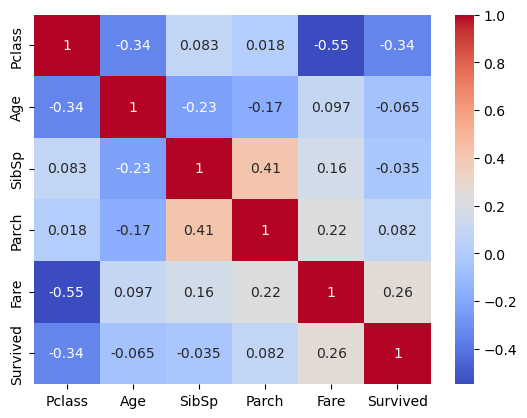

In [54]:
sns.heatmap(corr_data.corr(),cmap="coolwarm",annot=True,)

## Model Creation

In [55]:
train_data = new_data.drop('Survived', axis = 1)
target = new_data['Survived']
train_data.shape, target.shape

((891, 1726), (891,))

In [56]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [57]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [58]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.53333333 0.60674157 0.52808989 0.58426966 0.62921348 0.57303371
 0.49438202 0.56179775 0.5505618  0.47191011]


In [59]:
#learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
clf = [KNeighborsClassifier(n_neighbors = 13),DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=13),GaussianNB(),SVC(),ExtraTreeClassifier(),
      GradientBoostingClassifier(n_estimators=10, learning_rate=1,max_features=3, max_depth =3, random_state = 10),AdaBoostClassifier(),ExtraTreesClassifier()]
def model_fit():
    scoring = 'accuracy'
    for i in range(len(clf)):
        score = cross_val_score(clf[i], train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
        print("Score of Model",i,":",round(np.mean(score)*100,2))
#     round(np.mean(score)*100,2)
#     print("Score of :\n",score)
model_fit()

Score of Model 0 : 55.33
Score of Model 1 : 81.25
Score of Model 2 : 81.15
Score of Model 3 : 47.25
Score of Model 4 : 61.62
Score of Model 5 : 77.78
Score of Model 6 : 61.06
Score of Model 7 : 80.25
Score of Model 8 : 82.83


### Model evaluation

While both Decision Tree and Random Forest score the same, we choose to use Random Forest as they correct for decision trees' habit of overfitting to their training set.

In [60]:
# saving model with the help of pickle
import pickle

file = open('mlp_classifier_model.pkl','wb')
pickle.dump(new_data,file)